In [1]:
import pandas as pd

In [2]:
test = pd.read_csv("dataset.csv")

In [3]:
test.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16131500152,12-06-2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Ahmedabad,50613,POINT (-92.429331 42.512766),7,Ahmedabad,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
1,INV-16062000032,12-04-2018,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,Bangalore,52240,POINT (-91.518868 41.676095),52,Bangalore,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,3,81.0,2.25,0.59
2,INV-15962400282,11/29/2018,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,Mumbai,50613,POINT (-92.429331 42.512766),7,Mumbai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19
3,INV-16226300035,12-11-2018,2545,HY-VEE / IOWA CITY,310 N 1ST ST,Chennai,52245,POINT (-91.528105 42.207428),52,Chennai,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,2,54.0,1.50,0.39
4,INV-16296600079,12/13/2018,2582,HY-VEE #2 FOOD STORE / MASON CITY,551 S ILLINOIS AVE,Kolkata,50401,POINT (-93.17114 43.14623),17,Delhi,...,27890,"Nutty, smooth, and richly almond-flavored",12,750,18.0,27.0,1,27.0,0.75,0.19


In [4]:
test.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   5246
City                         0
Zip Code                     0
Store Location           97272
County Number                0
County                       0
Category                  3710
Category Name             3710
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description            21
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [5]:
test.dropna(inplace=True)

In [12]:
test.drop(columns=["City", "County"], axis=1, inplace=True)

In [13]:
test.shape

(947927, 22)

In [14]:
test.isnull().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
Zip Code                 0
Store Location           0
County Number            0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [15]:
from dateutil import parser

# Sample date column
date_series = pd.Series([
    "12-06-2018", "12/04/2018", "11/29/2018", "12-11-2018", 
    "12/13/2018", "01-08-2019", "02/07/2019", "06-07-2018", 
    "08-02-2018", "10/31/2017", "04-09-2014", "25-12-2020", "31/01/2019"
])

# Function to parse mixed date formats
def parse_dates(date_str):
    try:
        return parser.parse(date_str, dayfirst=False)  # Try Month-Day-Year first
    except ValueError:
        return parser.parse(date_str, dayfirst=True)   # Try Day-Month-Year if failed

# Apply function to each date
test['Date'] = test['Date'].apply(parse_dates)

In [16]:
test["Year"] = test["Date"].dt.year
test["Month"] = test["Date"].dt.month
test["Day"] = test["Date"].dt.day

In [17]:
import re

def clean_store_name(store):
    return re.sub(r'\s*[/#].*|\d+', '', store).strip()

In [18]:
test['Store Name'] = test['Store Name'].apply(clean_store_name)

In [21]:
test.to_csv("US_data.csv", index=False)


In [33]:
zipcode_list = test['Zip Code'].unique().tolist()

In [42]:
zipcode_df = pd.DataFrame({'Zip Code': zipcode_list})


In [36]:
import pgeocode

In [44]:
nomi = pgeocode.Nominatim('us')

# Get location details for each ZIP code
zipcode_df['city'] = zipcode_df['Zip Code'].apply(lambda x: nomi.query_postal_code(x).place_name)
zipcode_df['state'] = zipcode_df['Zip Code'].apply(lambda x: nomi.query_postal_code(x).state_name)

In [38]:
zipcode_df.head()

,zipcode,city,state
0,50613,Cedar Falls,Iowa
1,52240,Iowa City,Iowa
2,52245,Iowa City,Iowa
3,50401,Mason City,Iowa
4,52057,Manchester,Iowa


In [46]:
result_df = test.merge(zipcode_df, on='Zip Code', how='right')

In [54]:

# Extract Longitude & Latitude
result_df['Longitude'] = result_df['Store Location'].str.extract(r'POINT \((-?\d+\.\d+)')
result_df['Latitude'] = result_df['Store Location'].str.extract(r' (-?\d+\.\d+)\)')

# Convert to Float
result_df[['Longitude', 'Latitude']] = result_df[['Longitude', 'Latitude']].astype(float)

In [60]:
result_df.dropna(inplace=True)

In [62]:
result_df.shape

(945570, 29)

In [63]:
result_df.to_csv("final_data_us.csv", index=False)


In [65]:
result_df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'Zip Code', 'Store Location', 'County Number', 'Category',
       'Category Name', 'Vendor Number', 'Vendor Name', 'Item Number',
       'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'Year', 'Month', 'Day',
       'city', 'state', 'Longitude', 'Latitude'],
      dtype='object')

In [64]:
result_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,Zip Code,Store Location,County Number,Category,Category Name,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day,city,state,Longitude,Latitude
0,INV-16131500152,2018-12-06,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,50613,POINT (-92.429331 42.512766),7,1011100.0,Almond Brew,...,27.0,0.75,0.19,2018,12,6,Cedar Falls,Iowa,-92.429331,42.512766
1,INV-15962400282,2018-11-29,4988,HAPPY'S STORES,5925 UNIVERSITY AVE,50613,POINT (-92.429331 42.512766),7,1011100.0,Almond Brew,...,27.0,0.75,0.19,2018,11,29,Cedar Falls,Iowa,-92.429331,42.512766
2,INV-17228100055,2019-01-29,2572,HY-VEE FOOD STORE,6301 UNIVERSITY,50613,POINT (-92.435236 42.512789),7,1011100.0,Almond Brew,...,54.0,1.50,0.39,2019,1,29,Cedar Falls,Iowa,-92.435236,42.512789
3,INV-17357000043,2019-02-05,2572,HY-VEE FOOD STORE,6301 UNIVERSITY,50613,POINT (-92.435236 42.512789),7,1011100.0,Almond Brew,...,54.0,1.50,0.39,2019,2,5,Cedar Falls,Iowa,-92.435236,42.512789
4,INV-17514700036,2019-02-12,2572,HY-VEE FOOD STORE,6301 UNIVERSITY,50613,POINT (-92.435236 42.512789),7,1011100.0,Almond Brew,...,81.0,2.25,0.59,2019,2,12,Cedar Falls,Iowa,-92.435236,42.512789


In [50]:
dash = pd.read_csv("final_USA_dataset.csv")

In [48]:
!pip uninstall geopy

^C


# Models For Strategies

In [6]:
result_df = pd.read_csv("final_data_us.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
df = result_df.copy()

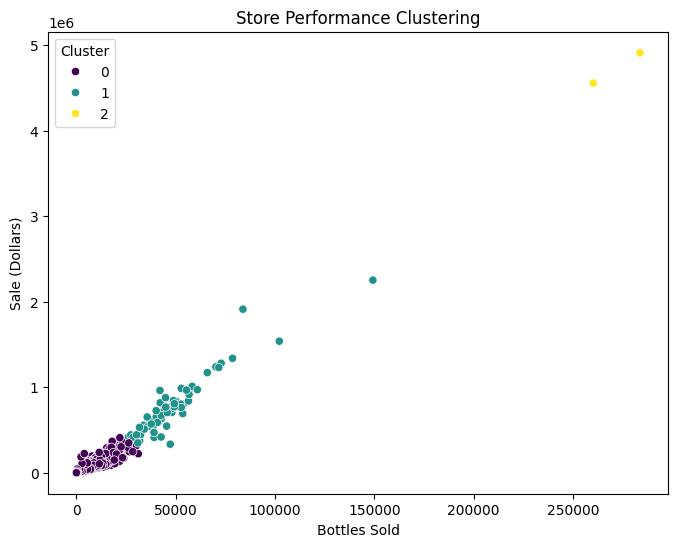

In [70]:
store_df = df[['Store Number', 'Bottles Sold', 'Sale (Dollars)']]
store_df = store_df.groupby('Store Number').sum()
scaler = StandardScaler()
store_scaled = scaler.fit_transform(store_df)
kmeans = KMeans(n_clusters=3, random_state=42)
store_df['Cluster'] = kmeans.fit_predict(store_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=store_df['Bottles Sold'], y=store_df['Sale (Dollars)'], hue=store_df['Cluster'], palette='viridis')
plt.title('Store Performance Clustering')
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945570 entries, 0 to 947926
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Invoice/Item Number    945570 non-null  object        
 1   Date                   945570 non-null  datetime64[ns]
 2   Store Number           945570 non-null  int64         
 3   Store Name             945570 non-null  object        
 4   Address                945570 non-null  object        
 5   Zip Code               945570 non-null  int64         
 6   Store Location         945570 non-null  object        
 7   County Number          945570 non-null  int64         
 8   Category               945570 non-null  float64       
 9   Category Name          945570 non-null  object        
 10  Vendor Number          945570 non-null  float64       
 11  Vendor Name            945570 non-null  object        
 12  Item Number            945570 non-null  int64    

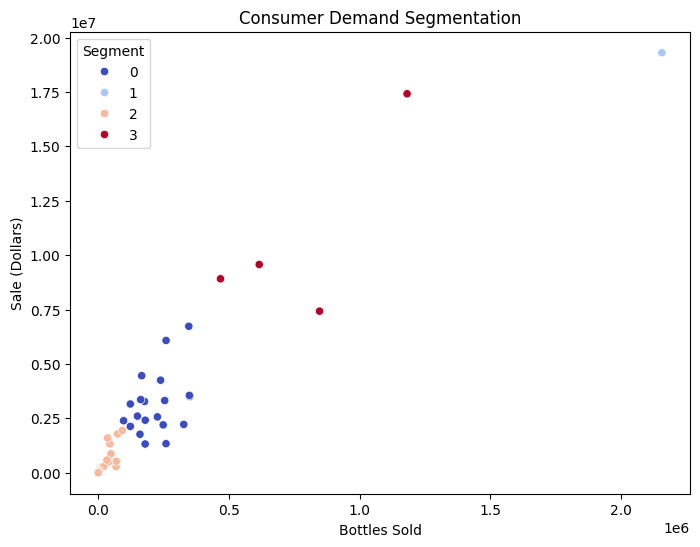

In [76]:

consumer_df = df[['Category Name', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Gallons)', 'Pack']]
consumer_df = consumer_df.groupby('Category Name').sum()
consumer_scaled = scaler.fit_transform(consumer_df)
kmeans_consumer = KMeans(n_clusters=4, random_state=42)
consumer_df['Segment'] = kmeans_consumer.fit_predict(consumer_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=consumer_df['Bottles Sold'], y=consumer_df['Sale (Dollars)'], hue=consumer_df['Segment'], palette='coolwarm')
plt.title('Consumer Demand Segmentation')
plt.show()


In [73]:
promo_df = df[['Month', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail']]
X = promo_df[['Month', 'State Bottle Retail']]
y = promo_df['Sale (Dollars)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Promotion Effectiveness Model Score: {model.score(X_test, y_test)}')


Promotion Effectiveness Model Score: 0.005831805613984442


# model for inventory Management

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [9]:
# Encoding categorical variables
for col in ['Category Name', 'Vendor Name', 'Item Description']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [10]:
categorical_cols = ['Store Name', 'Category Name', 'Vendor Name', 'Item Description', 'city', 'state']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders if needed for inverse transformation


In [11]:
# Feature and target selection
X = df.drop(columns=['Invoice/Item Number','Date','Bottles Sold', 'Sale (Dollars)','Address','Store Location'])
y = df['Bottles Sold']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'SVM': SVR()
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results